In [26]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt 
%matplotlib inline
drinks = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/drinking_water.xls")
computers = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/computers.xls")
electricity = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/electricity.xls")
boys_toilet = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/boys_toilet.xls")
girls_toilet = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/girls_toilet.xls")
pd.set_option('display.max_columns', 500)

In [27]:
def returner(xx):
    x=[]
    for i in range(36):
        x.append(xx[['State_UT','All Schools']].loc[3*i])  
    x=pd.DataFrame(x)
    x.set_index('State_UT', inplace=True)
    return x

In [28]:
drinks=returner(drinks)
drinks.columns=['Drinking water']
electricity=returner(electricity)
electricity.columns=['Electricity']
computers=returner(computers)
computers.columns=["Computer"]
boys_t=returner(boys_toilet)
boys_t.columns=['Boys toilet']
girls_t=returner(girls_toilet)
girls_t.columns=['Girls toilet']

In [29]:
factors=pd.concat([drinks,electricity,computers,boys_t,girls_t],axis=1)

In [30]:
factors.corr().style.background_gradient(cmap="Reds")

,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
Drinking water,1.000000,0.639871,0.462575,0.687693,0.743892
Electricity,0.639871,1.000000,0.752674,0.490077,0.599604
Computer,0.462575,0.752674,1.000000,0.519278,0.508257
Boys toilet,0.687693,0.490077,0.519278,1.000000,0.845895
Girls toilet,0.743892,0.599604,0.508257,0.845895,1.000000


## Good schools have both girls toilets and drinking water. There is high correlation between boys and girls toilets. So there isn't discrimination evident. Electricity and computers also have a fair correlation. So schools which have Electricity, have set up computer labs 

In [39]:
def create_clusters(x):
    
    states = x['State_UT']
    x.drop(['State_UT'],axis=1,inplace=True)
    scores=[]
    for i in range(4,36):
        k=KMeans(n_clusters=i,n_init=500, max_iter=500)
        k.fit(x)
        label=KMeans.predict(k,x)
        scores.append(silhouette_score(x, label))

    pd.DataFrame(scores).plot()
    best_cluster_no=np.argmax(scores[2:36])+2
    plt.axvline(best_cluster_no)
    plt.text(best_cluster_no, 0.34,s=f"Max silhoutte score at n={best_cluster_no}")
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte score")
    
    kk=KMeans(n_clusters=best_cluster_no)
    kk.fit(x)
    lab = pd.DataFrame(kk.labels_,columns=['Labels'])
    result=pd.concat([states,x,lab['Labels']],axis=1)
    return result

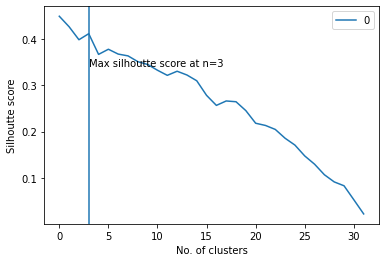

In [40]:
result=create_clusters(factors.reset_index())

In [41]:
result

,State_UT,Drinking water,Electricity,Computer,Boys toilet,Girls toilet,Labels
0,Andaman & Nicobar Islands,98.69,88.86,53.06,94.52,93.44,2
1,Andhra Pradesh,90.35,90.34,29.57,56.88,81.31,2
2,Arunachal Pradesh,79.79,36.35,24.28,48.73,76.90,1
3,Assam,80.30,19.39,8.85,60.17,75.28,1
4,Bihar,92.53,9.96,5.47,73.42,75.41,1
5,Chandigarh,100.00,100.00,95.83,100.00,100.00,0
6,Chhattisgarh,95.47,57.28,9.80,82.85,94.10,1
7,Dadra & Nagar Haveli,100.00,96.79,38.19,85.53,94.36,2
8,Daman & Diu,100.00,100.00,61.11,100.00,100.00,2
9,Delhi,100.00,100.00,81.56,100.00,100.00,0


In [44]:
grouping=result[['State_UT','Labels']]
clusters=pd.DataFrame()
for l in grouping.Labels.unique():
    clusters=pd.concat([clusters,pd.Series(np.array(grouping['State_UT'][grouping.Labels==l]), name=f"Cluster {l+1}").to_frame()],axis=1)
clusters.replace({np.nan:'-'},inplace=True)
clusters.sort_index(axis=1)

,Cluster 1,Cluster 2,Cluster 3
0,Chandigarh,Arunachal Pradesh,Andaman & Nicobar Islands
1,Delhi,Assam,Andhra Pradesh
2,Gujarat,Bihar,Dadra & Nagar Haveli
3,Kerala,Chhattisgarh,Daman & Diu
4,Lakshadweep,Jammu And Kashmir,Goa
5,Puducherry,Jharkhand,Haryana
6,-,Madhya Pradesh,Himachal Pradesh
7,-,Manipur,Karnataka
8,-,Meghalaya,Maharashtra
9,-,Nagaland,Mizoram


In [49]:
reqd=result.groupby('Labels')[result.columns[1:-1]].agg('mean')
reqd['Average availability of factors'] = (reqd['Drinking water']+reqd['Electricity']+reqd['Boys toilet']+reqd['Computer']+reqd['Girls toilet'])/5
reqd.sort_values(['Average availability of factors'], ascending=False).style.background_gradient(cmap='Greens')

,Drinking water,Electricity,Computer,Boys toilet,Girls toilet,Average availability of factors
Labels,,,,,,
0,99.895000,99.300000,89.953333,99.078333,99.528333,97.551000
2,97.634000,91.074667,42.336000,89.404000,96.189333,83.327600
1,88.489333,33.644000,15.374667,80.696000,86.678000,60.976400
